In [1]:
import labcamera_tis
Device = labcamera_tis.Device

[2021-11-19 14:45:36,694 ks-labcamera-tis] INFO: loaded TIS_UDSHL


In [2]:
CONFIG_FRAME_RATE  = 30
CONFIG_EXT_TRIGGER = False

In [3]:
Device.list_names()

('DMK 33UP1300 2121006',)

In [4]:
dev = Device('DMK 33UP1300 2121006')

[2021-11-19 14:45:42,447 ks-labcamera-tis] WARNING: cannot flip images vertically in hardware


In [5]:
dev._is_open()

True

In [6]:
dev.is_valid()

True

In [7]:
dev.video_format

'Y16 (640x480)'

In [8]:
dev.list_video_formats()

('Y16 (256x16)',
 'Y16 (320x240)',
 'Y16 (320x256)',
 'Y16 (320x480)',
 'Y16 (352x240)',
 'Y16 (352x288)',
 'Y16 (384x288)',
 'Y16 (640x240)',
 'Y16 (640x288)',
 'Y16 (640x480)',
 'Y16 (640x512)',
 'Y16 (704x576)',
 'Y16 (720x240)',
 'Y16 (720x288)',
 'Y16 (720x480)',
 'Y16 (720x576)',
 'Y16 (768x576)',
 'Y16 (1024x768)',
 'Y16 (1280x960)',
 'Y16 (1280x1024)',
 'Y800 (256x16)',
 'Y800 (320x240)',
 'Y800 (320x256)',
 'Y800 (320x480)',
 'Y800 (352x240)',
 'Y800 (352x288)',
 'Y800 (384x288)',
 'Y800 (640x240)',
 'Y800 (640x288)',
 'Y800 (640x480)',
 'Y800 (640x512)',
 'Y800 (704x576)',
 'Y800 (720x240)',
 'Y800 (720x288)',
 'Y800 (720x480)',
 'Y800 (720x576)',
 'Y800 (768x576)',
 'Y800 (1024x768)',
 'Y800 (1280x960)',
 'Y800 (1280x1024)',
 'RGB24 (256x16)',
 'RGB24 (320x240)',
 'RGB24 (320x256)',
 'RGB24 (320x480)',
 'RGB24 (352x240)',
 'RGB24 (352x288)',
 'RGB24 (384x288)',
 'RGB24 (640x240)',
 'RGB24 (640x288)',
 'RGB24 (640x480)',
 'RGB24 (640x512)',
 'RGB24 (704x576)',
 'RGB24 (720x24

In [9]:
dev.video_format = 'RGB24 (320x240)'

In [10]:
dev.video_format

'RGB24 (320x240)'

In [11]:
dev.triggered

False

In [12]:
dev.triggered = CONFIG_EXT_TRIGGER
dev.triggered

False

In [13]:
dev.frame_rate

1.0

In [14]:
dev.frame_rate = CONFIG_FRAME_RATE

dev.frame_rate

30.00003000003

In [15]:
dev.props["Exposure"]["Value"].interfaces

('Range', 'AbsoluteValue')

In [16]:
dev.props["Exposure"]["Auto"].type

'Switch'

In [17]:
dev.props["Exposure"]["Auto"].value

False

In [18]:
dev.props["Exposure"]["Value"].value

0.10000000149011612

In [19]:
dev.props["Exposure"]["Value"].value = 0.010
dev.props["Exposure"]["Value"].value

0.009999999776482582

In [20]:
dev.props["Startup Behavior"]["Status"].value

'Factory Default'

## Testing strobe output

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from time import sleep

In [22]:
assert dev.strobe == False

In [23]:
print("running... ", end="", flush=True)
dev.triggered = False
dev.prepare(buffer_size=0)
dev.start(strobe=True)

try:
    sleep(5)
finally:
    dev.stop(strobe=False)
    
print(f"done.", flush=True)

running... done.


In [25]:
print("running... ", end="", flush=True)
dev.triggered = True
dev.prepare(buffer_size=0)
dev.start(strobe=True)

try:
    sleep(10)
finally:
    dev.stop(strobe=False)
dev.triggered = False
    
print(f"done.", flush=True)

running... done.


## Testing capture

In [26]:
FRAME = None
COUNT = 0

def callback(frame):
    global FRAME, COUNT
    print(f"received a frame: shape={np.shape(frame)}", flush=True)
    if frame is not None:
        FRAME = frame.copy()
        COUNT += 1

In [27]:
dev.callbacks.clear()

In [28]:
COUNT = 0

dev.triggered = True
dev.callbacks.append(callback)
dev.prepare(buffer_size=10)

dev.start(strobe=True)
try:
    sleep(10)
finally:
    dev.stop(strobe=False)
dev.callbacks.clear()
dev.triggered = False

print(f"done: received {COUNT} callbacks", flush=True)

received a frame: shape=(240, 320, 3)
received a frame: shape=(240, 320, 3)
received a frame: shape=(240, 320, 3)
received a frame: shape=(240, 320, 3)
received a frame: shape=(240, 320, 3)
received a frame: shape=(240, 320, 3)
received a frame: shape=(240, 320, 3)
received a frame: shape=(240, 320, 3)
received a frame: shape=(240, 320, 3)
received a frame: shape=(240, 320, 3)
received a frame: shape=(240, 320, 3)
received a frame: shape=(240, 320, 3)
received a frame: shape=(240, 320, 3)
received a frame: shape=(240, 320, 3)
received a frame: shape=(240, 320, 3)
received a frame: shape=(240, 320, 3)
received a frame: shape=(240, 320, 3)
received a frame: shape=(240, 320, 3)
received a frame: shape=(240, 320, 3)
received a frame: shape=(240, 320, 3)
received a frame: shape=(240, 320, 3)
received a frame: shape=(240, 320, 3)
received a frame: shape=(240, 320, 3)
received a frame: shape=()
done: received 23 callbacks


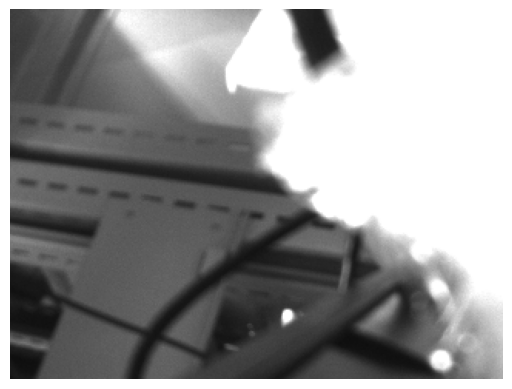

In [30]:
if FRAME is None:
    import sys
    print("***failed to capture frames", file=sys.stderr, flush=True)
else:
    plt.imshow(FRAME)
    plt.gca().set_axis_off()
    plt.show()

In [31]:
dev.close()

In [28]:
dev.is_valid()

False

In [29]:
del dev

In [30]:
del Device
del labcamera_tis